# Class Pratical Assigment
#### 28.03.2022


### References: 
 - https://github.com/TheAIFramework/PracticalMachineLearning/blob/Trees/4%20-%20Ensemble%20Methods.ipynb
 - https://github.com/TheAIFramework/PracticalMachineLearning/blob/Trees/3%20-%20Decision%20Trees.ipynb
 - https://github.com/TheAIFramework/PracticalMachineLearning/tree/gradient

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('Housing_Data.csv')

In [97]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [98]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## Data Analysis and Cleaning

In [100]:
# Encontra valores nulos no dataset
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [101]:
# Tamanho do dataset
print('Nº linhas:', df.shape[0])
print('Nº colunas:', df.shape[1])

Nº linhas: 5000
Nº colunas: 7


'Address' column doesnt significantly add something to the dataset, thus is full dropped

In [102]:
df = df.drop(['Address'], axis=1)

In [103]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06


In [104]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [105]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [106]:
def box_plotting(column_name):
    print("\n - ", column_name)
    # Gera gráfico caixa de bigodes
    fig = plt.figure()
    sns.boxplot(df[column_name])

    # Calcular os quartis e o indice quartil
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    median = df[column_name].median()
    print("Quartil 1: ", q1)
    print("Mediana: ", median)
    print("Quartil 3: ", q3)
    print("Interquantil Range (IQR): ", IQR)

    # Cacular os limites min/max para calcular outliers
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    print("Limite Superior:", upper)
    print("Limite Inferior:", lower)
        
    clean_data = df[~((df[column_name] < lower) |(df[column_name] > upper))]
    print("Qtd de outliers:", df.shape[0] - clean_data.shape[0])
    
    return {'lower': lower, 'upper': upper}


 -  Avg. Area Income
Quartil 1:  61480.562388460974
Mediana:  68804.28640371616
Quartil 3:  75783.33866615265
Interquantil Range (IQR):  14302.776277691672
Limite Superior: 97237.50308269015
Limite Inferior: 40026.39797192346
Qtd de outliers: 32

 -  Avg. Area House Age
Quartil 1:  5.322283015802158
Mediana:  5.970428947124802
Quartil 3:  6.6508084794160585
Interquantil Range (IQR):  1.3285254636139001
Limite Superior: 8.643596674836909
Limite Inferior: 3.329494820381308
Qtd de outliers: 25

 -  Avg. Area Number of Rooms
Quartil 1:  6.299250099611249
Mediana:  7.002901987201934
Quartil 3:  7.66587144759798
Interquantil Range (IQR):  1.3666213479867313
Limite Superior: 9.715803469578077
Limite Inferior: 4.249318077631152
Qtd de outliers: 24

 -  Avg. Area Number of Bedrooms
Quartil 1:  3.14
Mediana:  4.05
Quartil 3:  4.49
Interquantil Range (IQR):  1.35
Limite Superior: 6.515000000000001
Limite Inferior: 1.1149999999999998
Qtd de outliers: 0

 -  Area Population
Quartil 1:  29403.92870

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Manu

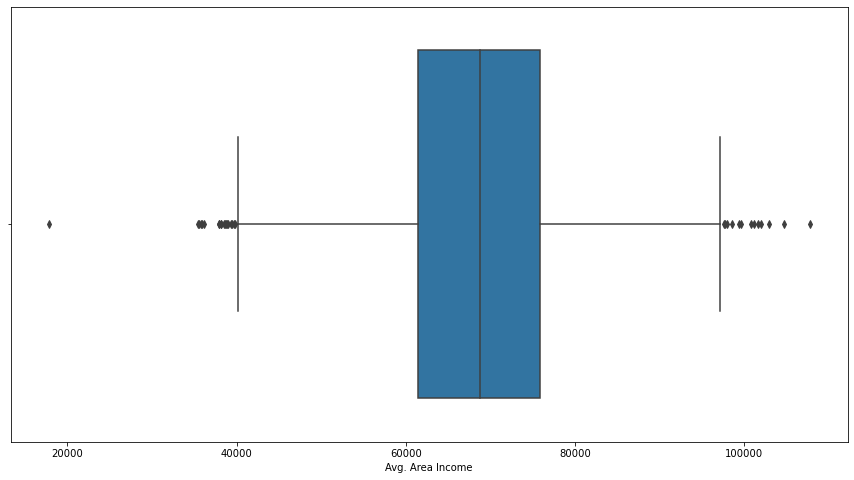

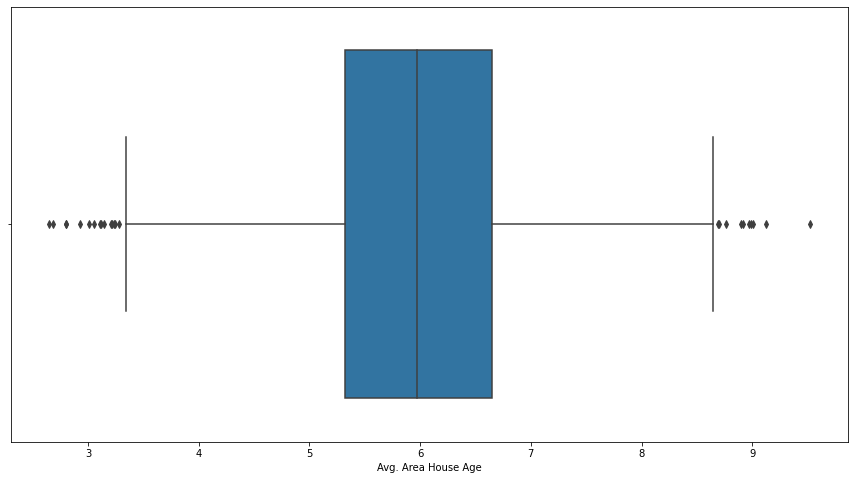

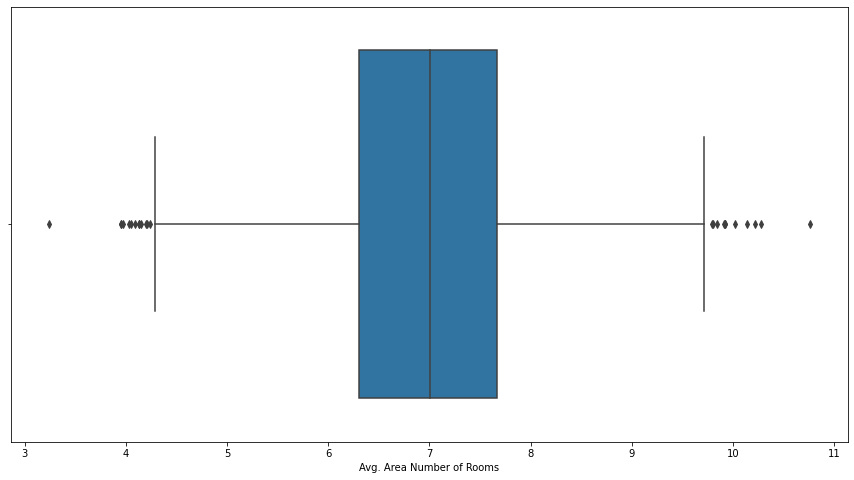

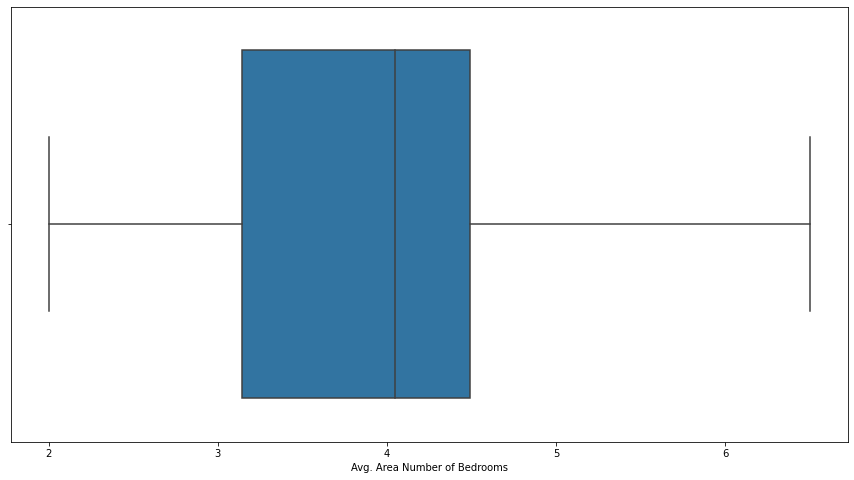

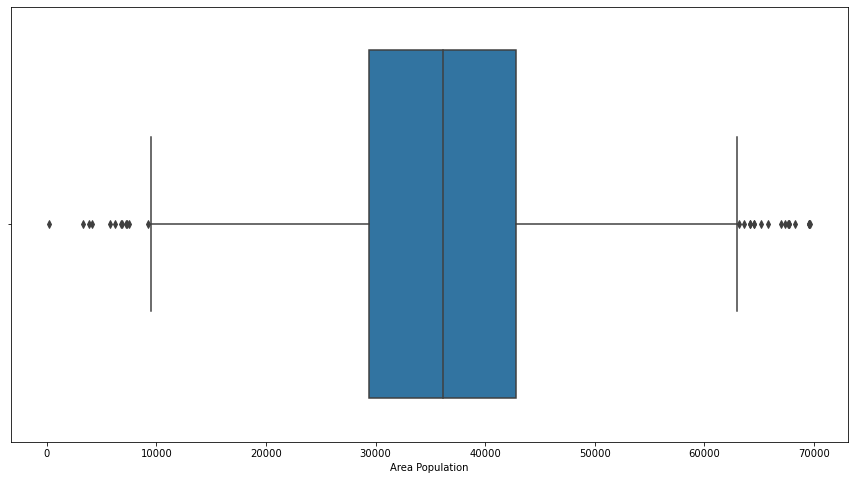

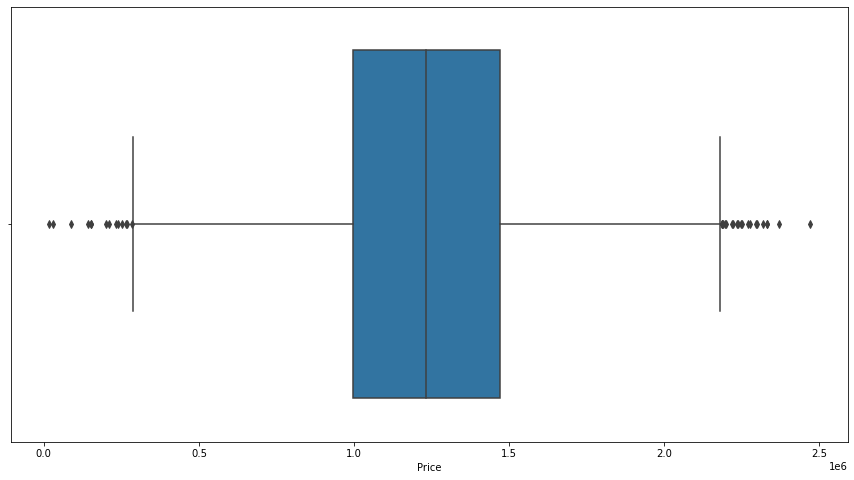

In [110]:
# Check for outliers in dataset
columns = df.columns
for col in columns:
    box_plotting(col)
#     df = df[~((df[col] < o['lower']) |(df[col] > o['upper']))]

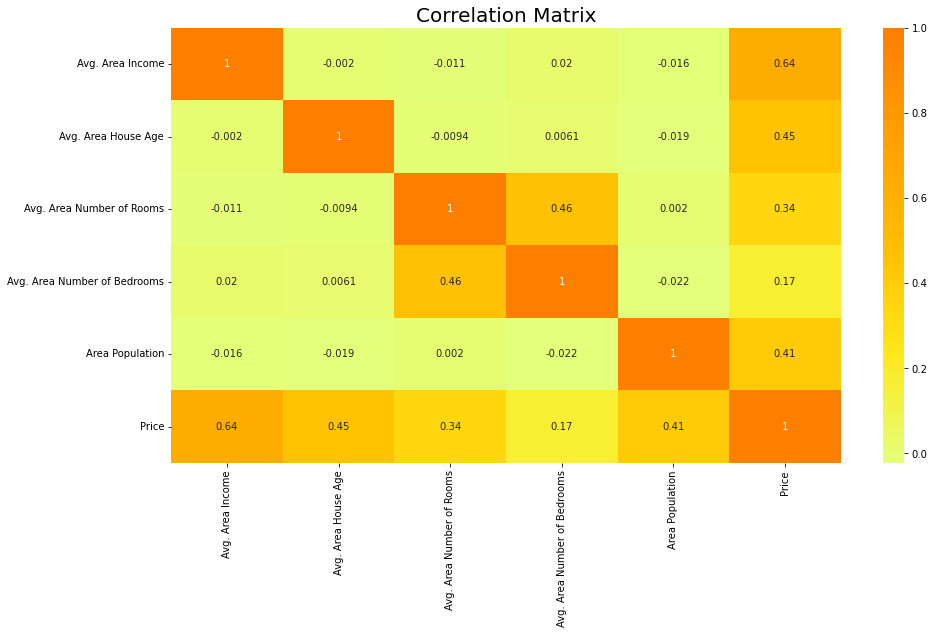

In [111]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

In [109]:
df.shape

(5000, 6)

## Models Training